### Instalando libs necessários

In [2]:
!pip install pandas
!pip install numpy

## Importando Bibliotecas

In [2]:
import pandas as pd 
import numpy as np

# Lendos os dados 

df = pd.read_csv("cleaned_data.csv")
df.head()

,extTemp (C),intTemp (C),humidity (percent),pm25 (mg/m3),pm10 (mg/m3),adc0 (mg/m3),adc2 (ppm),adc3 (mg/m3),moqaId,timeStamp
0,28.22876,32.38615,58.05937,15.690181,34.315151,3.121311,0.268501,46.859020,A70044,2024-01-01T00:00:03Z
1,32.54235,36.97697,46.58132,9.325829,24.868876,3.543427,0.197482,41.806511,DC663C,2024-01-01T00:00:10Z
2,29.99941,30.98130,65.67487,16.140867,31.963614,0.527346,0.184367,67.608971,EDA13C,2024-01-01T00:00:13Z
3,31.01328,41.56213,36.24458,11.905557,26.572903,1.625668,0.194427,66.818123,DC40AC,2024-01-01T00:00:15Z
4,35.19424,40.62391,38.64288,10.316311,27.286671,3.122561,0.152971,35.684101,E4C790,2024-01-01T00:00:14Z


## Verificando se há dados faltantes

In [3]:
df.isnull().sum()

extTemp (C)           0
intTemp (C)           0
humidity (percent)    0
pm25 (mg/m3)          0
pm10 (mg/m3)          0
adc0 (mg/m3)          0
adc2 (ppm)            0
adc3 (mg/m3)          0
moqaId                0
timeStamp             0
dtype: int64

## Agrupando os dados em uma janela de 24h

* Nesse trecho eu realizei a média do agrupamento dos dados em uma janela de 24h. Fiz isso para as variáveis "pm25 (mg/m3)", "pm10 (mg/m3)", "humidity (percent)", "extTemp", "intTemp"

In [5]:
#transformando os dados para datetime
df["timeStamp"] = pd.to_datetime(df["timeStamp"])
df["Data"] = df["timeStamp"].dt.date

df_diario = df.groupby("Data")[["pm25 (mg/m3)", "pm10 (mg/m3)", "humidity (percent)", "extTemp (C)", "intTemp (C)"]].mean().reset_index()

df_diario.rename(columns={
        "pm25 (mg/m3)": "pm25_media_24h", 
        "pm10 (mg/m3)": "pm10_media_24h",
        "humidity (percent)": "humidity_media_24h",
        "extTemp": "extTemp_media_24h",
        "intTemp": "intTemp_media_24h"         
        }, inplace=True)

print(df_diario.head())


         Data  pm25_media_24h  pm10_media_24h  humidity_media_24h  \
0  2024-01-01       11.729843       29.363469           46.989993   
1  2024-01-02       12.338068       29.533014           47.813470   
2  2024-01-03       11.239982       28.905678           50.197518   
3  2024-01-04       10.628902       28.429534           50.343583   
4  2024-01-05       12.300668       30.610354           49.072392   

   extTemp (C)  intTemp (C)  
0    31.404343    37.190303  
1    30.418527    35.105364  
2    29.853910    34.145258  
3    29.021183    33.030934  
4    29.875233    34.294505  


In [6]:
df_diario

,Data,pm25_media_24h,pm10_media_24h,humidity_media_24h,extTemp (C),intTemp (C)
0,2024-01-01,11.729843,29.363469,46.989993,31.404343,37.190303
1,2024-01-02,12.338068,29.533014,47.813470,30.418527,35.105364
2,2024-01-03,11.239982,28.905678,50.197518,29.853910,34.145258
3,2024-01-04,10.628902,28.429534,50.343583,29.021183,33.030934
4,2024-01-05,12.300668,30.610354,49.072392,29.875233,34.294505
5,2024-01-06,11.989121,30.215023,49.486823,31.232820,35.258798
6,2024-01-07,11.023526,29.819808,49.581690,31.586324,35.546088
7,2024-01-08,11.713253,30.031878,46.927399,30.915760,35.558674
8,2024-01-09,11.791284,29.883665,46.713085,30.724937,35.825623
9,2024-01-10,11.952223,30.414148,45.968795,30.495798,35.556086


## Equilibrando as classes de dados

* Como as classes estavam desiquilibrada no que tange os dados, fiz a injeção de dados para minimizar o desiquilibrio entre as classes: **Qualidade Boa**, **Qualidade Moderada**, **Qualidade Ruim**.

In [7]:
num_novas_amostras = 100

# Gerando novos valores dentro de um intervaloo maior

novos_dados = pd.DataFrame({
    "Data": pd.date_range(start="2025-01-01", periods=num_novas_amostras, freq="D"),
    "pm25_media_24h": np.random.uniform(15, 75, num_novas_amostras),
    "pm10_media_24h": np.random.uniform(40, 150, num_novas_amostras),
    "humidity_media_24h": np.random.uniform(df_diario["humidity_media_24h"].min(), 
                                            df_diario["humidity_media_24h"].max(), 
                                            num_novas_amostras),
    "extTemp (C)": np.random.uniform(df_diario["extTemp (C)"].min(), 
                                           df_diario["extTemp (C)"].max(), 
                                           num_novas_amostras),
    "intTemp (C)": np.random.uniform(df_diario["intTemp (C)"].min(), 
                                           df_diario["intTemp (C)"].max(), 
                                           num_novas_amostras)
    
})

# Concatenar os novos dados ao DataFrame original
df_equilibrado = pd.concat([df_diario, novos_dados], ignore_index=True)

print(df_equilibrado.head())

 

         Data  pm25_media_24h  pm10_media_24h  humidity_media_24h  \
0  2024-01-01       11.729843       29.363469           46.989993   
1  2024-01-02       12.338068       29.533014           47.813470   
2  2024-01-03       11.239982       28.905678           50.197518   
3  2024-01-04       10.628902       28.429534           50.343583   
4  2024-01-05       12.300668       30.610354           49.072392   

   extTemp (C)  intTemp (C)  
0    31.404343    37.190303  
1    30.418527    35.105364  
2    29.853910    34.145258  
3    29.021183    33.030934  
4    29.875233    34.294505  


In [8]:
print(df_equilibrado["pm25_media_24h"].describe())  
print(df_equilibrado["pm10_media_24h"].describe()) 

count    153.000000
mean      31.608042
std       19.978611
min       10.073432
25%       12.511056
50%       25.775294
75%       48.165961
max       74.831147
Name: pm25_media_24h, dtype: float64
count    153.000000
mean      75.264143
std       40.258565
min       27.142622
25%       32.628460
50%       75.815193
75%      110.971552
max      148.401767
Name: pm10_media_24h, dtype: float64


## Criando a coluna classificação para a janela de 24h das variáveis

* Os dados na forma crua, vinheram sem uma variável categórica para verificar se a classificação da qualidade era dada como boa, moderada ou ruim. Dessa forma, de acordo com a tabela de classificação de qualidade do ar da Secretaria de Urbanismo e Meio Ambiente de Fortaleza, criei uma rotina simples para classificação. Agora temos uma nova coluna no dataframe, chamada "qualidade_ar".

In [9]:
df_equilibrado

,Data,pm25_media_24h,pm10_media_24h,humidity_media_24h,extTemp (C),intTemp (C)
0,2024-01-01,11.729843,29.363469,46.989993,31.404343,37.190303
1,2024-01-02,12.338068,29.533014,47.813470,30.418527,35.105364
2,2024-01-03,11.239982,28.905678,50.197518,29.853910,34.145258
3,2024-01-04,10.628902,28.429534,50.343583,29.021183,33.030934
4,2024-01-05,12.300668,30.610354,49.072392,29.875233,34.294505
...,...,...,...,...,...,...
148,2025-04-06 00:00:00,53.628560,145.175822,74.650432,31.036294,32.933623
149,2025-04-07 00:00:00,26.304928,111.554271,43.395035,29.881407,30.477737
150,2025-04-08 00:00:00,45.431228,116.195370,62.808246,27.683771,30.664553
151,2025-04-09 00:00:00,25.417483,115.518789,58.480437,27.639577,33.758924


In [10]:
'''
def classificar_qualidade(pm25, pm10):
    if (pm25 <= 25) or (pm10<= 50):
        return "Boa"
    elif (pm25 > 25 and pm25 <= 50) or (pm10 > 50 and pm10 <=100):
        return "Moderada"
    else:
        return "Ruim"

# Aplicar a classificação de qualidade do ar para cada linha no DataFrame
df["qualidade_ar"] = df["pm25 (mg/m3)"].apply(classificar_qualidade)
'''
print(df_equilibrado.columns)


def classificar_qualidade(row):
    pm25 = row["pm25_media_24h"]
    pm10 = row["pm10_media_24h"]

    if (pm25 <= 25) and (pm10 <= 50):
        return "Boa"
    elif (25 < pm25 <= 50) or (50 < pm10 <= 100):
        return "Moderada"
    else:
        return "Ruim"

# Aplicar a classificação de qualidade do ar considerando pm2.5 e pm10
df_equilibrado["qualidade_ar"] = df_equilibrado.apply(classificar_qualidade, axis=1)

# Exibir as primeiras linhas para ver o resultado
print(df_equilibrado.head())

Index(['Data', 'pm25_media_24h', 'pm10_media_24h', 'humidity_media_24h',
       'extTemp (C)', 'intTemp (C)'],
      dtype='object')
         Data  pm25_media_24h  pm10_media_24h  humidity_media_24h  \
0  2024-01-01       11.729843       29.363469           46.989993   
1  2024-01-02       12.338068       29.533014           47.813470   
2  2024-01-03       11.239982       28.905678           50.197518   
3  2024-01-04       10.628902       28.429534           50.343583   
4  2024-01-05       12.300668       30.610354           49.072392   

   extTemp (C)  intTemp (C) qualidade_ar  
0    31.404343    37.190303          Boa  
1    30.418527    35.105364          Boa  
2    29.853910    34.145258          Boa  
3    29.021183    33.030934          Boa  
4    29.875233    34.294505          Boa  


In [11]:
df_equilibrado["qualidade_ar"].value_counts()

qualidade_ar
Moderada    70
Boa         53
Ruim        30
Name: count, dtype: int64

In [12]:
!pip install scikit-learn

## Dividindo os dados de teste e treinamento

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


X = df_equilibrado[["humidity_media_24h", "extTemp (C)", "intTemp (C)", "pm25_media_24h", "pm10_media_24h"]]
y = df_equilibrado["qualidade_ar"]

# Aqui eu converto as classes para valores numéricos
encoder = LabelEncoder()
y = encoder.fit_transform(y)  # Transforma "Boa", "Moderada", "Ruim" (ex: 0, 1, 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Normalizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



## Treinando o modelo knn

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Criar e treinar o modelo KNN com k=5 (pode ser ajustado)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


# Fazendo previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Avaliação do modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))

Acurácia: 0.8695652173913043

Relatório de Classificação:
               precision    recall  f1-score   support

         Boa       1.00      1.00      1.00        18
    Moderada       0.84      0.91      0.88        23
        Ruim       0.33      0.20      0.25         5

    accuracy                           0.87        46
   macro avg       0.72      0.70      0.71        46
weighted avg       0.85      0.87      0.86        46



## Gerando a matriz de confusão:

In [17]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[18  0  0]
 [ 0 21  2]
 [ 0  4  1]]


In [19]:
!pip install matplotlib
!pip install seaborn

  Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 798.0 kB/s eta 0:00:00 kB/s eta 0:00:01:01
  Using cached pillow-11.1.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (9.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 6.1 MB/s eta 0:00:00m eta 0:00:010:00:01
Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (323 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 11.3 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.0 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 15.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

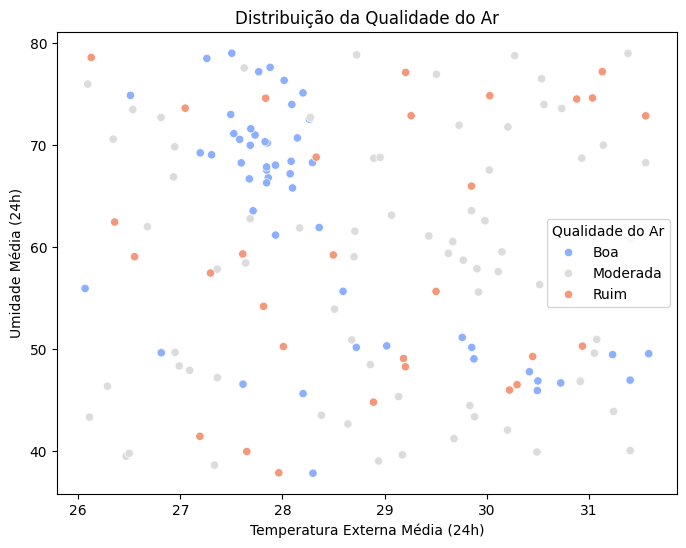

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando um gráfico de dispersão de Temperatura x Umidade
# obs: as classes são coloridas pelos três tipos de cores para pontos

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_equilibrado["extTemp (C)"], y=df_equilibrado["humidity_media_24h"], hue=df_equilibrado["qualidade_ar"], palette="coolwarm")

plt.xlabel("Temperatura Externa Média (24h)")
plt.ylabel("Umidade Média (24h)")
plt.title("Distribuição da Qualidade do Ar")
plt.legend(title="Qualidade do Ar")
plt.show()
